In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

using CSV, DelimitedFiles, DataFrames
using JLD2
using PlotlyJS

In [2]:
splg_methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS", # requires computing exact leverage scores
    "iid JL-LS",
    #"iid LS", # requires computing exact leverage scores
    "ST JL-LS",
    # "ST LS", # requires computing exact leverage scores
]
# simulation parameters
n_batch = 6; # maximum batch size considered
n_rep = 3; # number of runs

## Combinatorial Laplacian with random graphs

$q=0.1$

smallest eigvals
[1.1723955140041787e-16, 4.688461264990188, 6.402166353302866, 6.835724205044852, 7.190349786386056, 7.246361155326935]


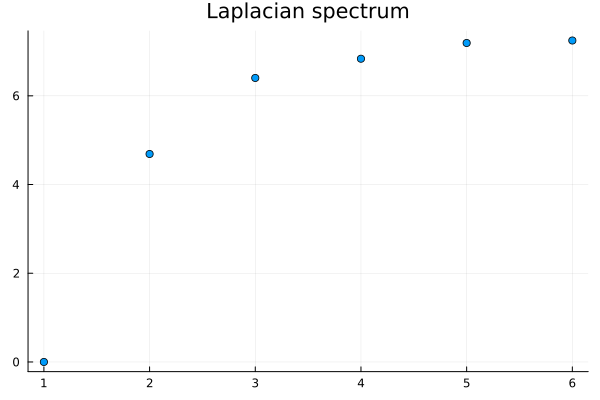

In [5]:
rng = Random.default_rng()
# connection graph parameters
n = 2000
p = 0.01
eta = 0.
# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end
### plotting Laplacian spectrum
B = sp_magnetic_incidence(meta_g)
Lap = B' * B
Lap = 0.5 * (Lap + Lap')
least_eigs,_ = eigs(Lap; nev=6, which=:SM)

println("smallest eigvals")
println(real.(least_eigs))

Plots.scatter(1:6,sort(real.(least_eigs));legend=false,title="Laplacian spectrum")

In [6]:
# regularization parameter
q = 0.1
# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)
# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)

name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
save("figures/data/"*name*"_data.jld2",
 "D_params", D_params,
 "D_results", D_results)

cond nb of Laplacian: 404.64761698442845
k = 

401 vs nb edges= 19993
 
k = 

401 vs nb edges= 19993
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

ST JL-LS

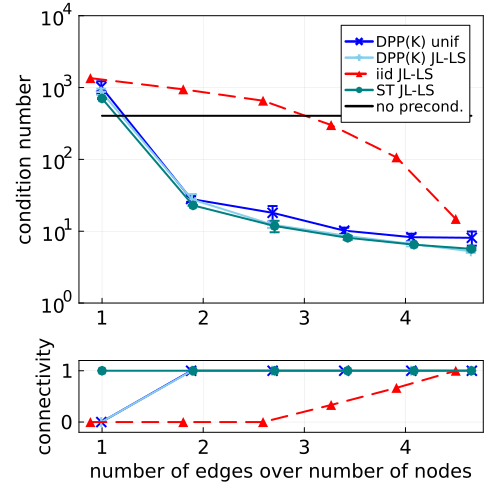

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondERn2000p0.01eta0.0q0.1.pdf"

In [10]:
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
D = load("figures/data/"*name*"_data.jld2")

D_results = D["D_results"]
# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)
# # saving plot
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
Plots.savefig("figures/"*name*".pdf")

$q= 0.001$

In [11]:
rng = Random.default_rng()
# connection graph parameters
n = 2000
p = 0.01
eta = 0.
# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)
# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

In [12]:
# regularization parameter
q = 0.001 
# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)

name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
save("figures/data/"*name*"_data.jld2",
 "D_params", D_params,
 "D_results", D_results)

cond nb of Laplacian: 39529.749630490995
k = 

402 vs nb edges= 20123
 
k = 

402 vs nb edges= 20123
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

ST JL-LS

Dict{Any, Any} with 4 entries:
  "iid JL-LS"    => Dict{String, Any}("cdL"=>39529.7, "sparsity_L"=>[0.0, 0.0, …
  "ST JL-LS"     => Dict{String, Any}("cdL"=>39529.7, "sparsity_L"=>[0.0, 0.0, …
  "DPP(K) unif"  => Dict{String, Any}("cdL"=>39529.7, "sparsity_L"=>[0.0, 0.0, …
  "DPP(K) JL-LS" => Dict{String, Any}("cdL"=>39529.7, "sparsity_L"=>[0.0, 0.0, …

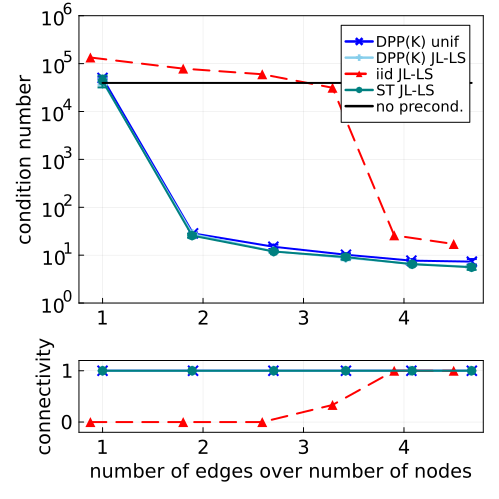

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondERn2000p0.01eta0.0q0.001.pdf"

In [14]:
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
D = load("figures/data/"*name*"_data.jld2")

D_results = D["D_results"]

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
Plots.savefig("figures/"*name*".pdf")

In [17]:

q = 0.001
# q = 0.1
name = "nb_roots_ER"*string(q)

nb_samples = 200
nb_roots = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    

save("figures/data/"*name*"_data.jld2",
 "nb_roots", nb_roots)

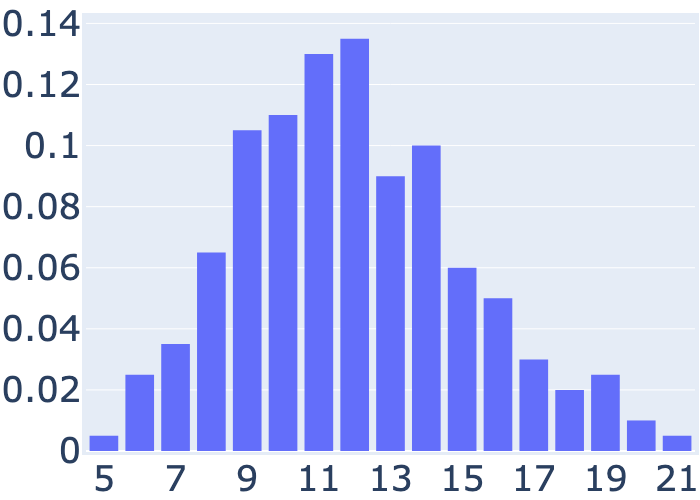

In [18]:

q=0.1
name = "nb_roots_ER"*string(q)

D = load("figures/data/"*name*"_data.jld2")
nb_roots = D["nb_roots"]

cat_nb_roots = string.(sort(Int.(nb_roots)))
trace = PlotlyJS.histogram(x=cat_nb_roots, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
# PlotlyJS.savefig(p,"figures/"*name*".pdf")

## Magnetic Laplacian with random graphs

MUN graph model

In [19]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 2000
p = 0.01
eta = 1e-1

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,splg_methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)


save("figures/data/"*name*"_data.jld2",
 "D_params", D_params,
 "D_results", D_results)

cond nb of Laplacian: 805.3565056582639
k = 

398 vs nb edges= 20066
 
k = 

398 vs nb edges= 20066
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

ST JL-LS

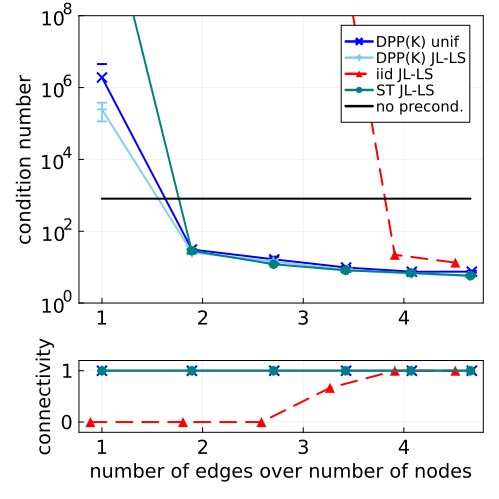

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondMUNn2000p0.01eta0.1q0.pdf"

In [27]:
D = load("figures/data/"*name*"_data.jld2")
D_results = D["D_results"]
# plotting
y_limits = (1,1e8)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)
# # saving plot
Plots.savefig("figures/"*name*".pdf")

In [ ]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
end    
name = "nb_cycles_MUN_precond_"*type*string(eta)

save("figures/data/"*name*"_data.jld2",
 "nb_cycles", nb_cycles)

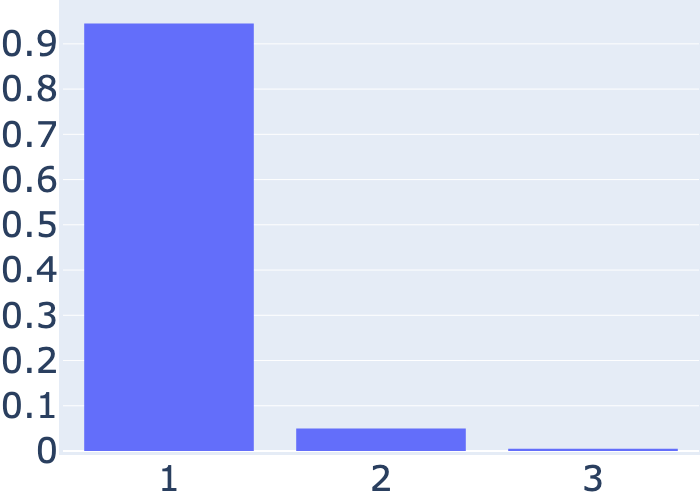

In [28]:
name = "nb_cycles_MUN_precond_"*type*string(eta)
D = load("figures/data/"*name*"_data.jld2")
nb_cycles = D["nb_cycles"]

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
# PlotlyJS.savefig(p,"figures/"*name*".pdf")


ERO graph model

In [40]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 2000 
p = 0.01 
eta = 1e-3 #1e-4 

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,splg_methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

save("figures/data/"*name*"_data.jld2",
 "D_params", D_params,
 "D_results", D_results)

cond nb of Laplacian: 3246.039314649937
k = 

397 vs nb edges= 19922
 
k = 

397 vs nb edges= 19922
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

ST JL-LS

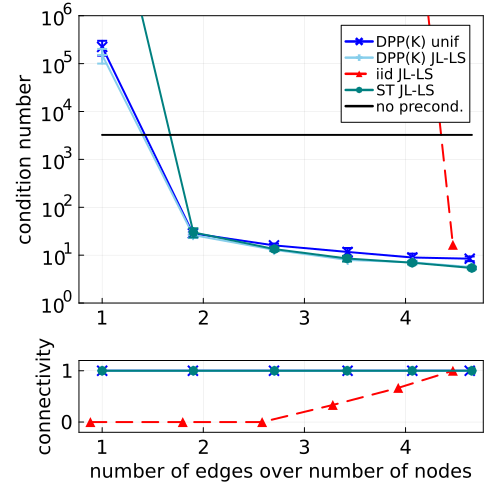

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondEROn2000p0.01eta0.001q0.pdf"

In [43]:
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
D = load("figures/data/"*name*"_data.jld2")
D_results = D["D_results"]

# plotting
y_limits = (1,1e6)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

Plots.savefig("figures/"*name*".pdf")

In [37]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
end    

name = "nb_cycles_"*type*string(eta)

save("figures/data/"*name*"_data.jld2",
 "nb_cycles", nb_cycles)

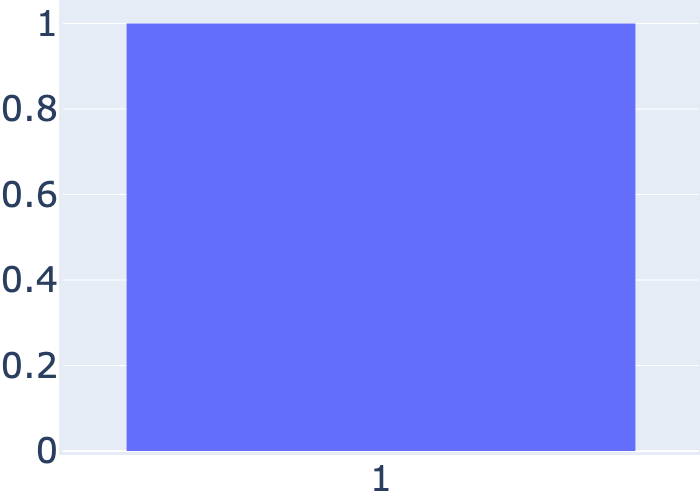

In [39]:
name = "nb_cycles_"*type*string(eta)
D = load("figures/data/"*name*"_data.jld2")

nb_cycles = D["nb_cycles"]

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
# PlotlyJS.savefig(p,"figures/"*name*".pdf")